In [4]:
from qiskit import QuantumCircuit
from qiskit.transpiler import PassManager
import sys
sys.path.append("..")
from backend_utils.backend_analysis_pass import TopologyAnalysis
qc = QuantumCircuit(1)
from backend_utils.mock_backends.ibm import *

In [6]:
backend_list = [PenguinV1(), PenguinV2(), PenguinV3(), PenguinV4(), FalconR4()]

for backend in backend_list:
    print(backend.name)
    pm1 = PassManager(TopologyAnalysis(backend))
    pm1.run(qc)
    #FIXME, just save the property_set dictionary directly
    for key, value in pm1.property_set.items():
        print(key, value)
    print()

penguin_V1
Diameter 5.0
Avg_Distance 2.31
Degree 6.0
Avg_Connectivity 4.0

penguin_V2
Diameter 4.0
Avg_Distance 2.295
Degree 6.0
Avg_Connectivity 3.9

penguin_V3
Diameter 7.0
Avg_Distance 3.37
Degree 3.0
Avg_Connectivity 2.3

penguin_V4
Diameter 7.0
Avg_Distance 3.31
Degree 3.0
Avg_Connectivity 2.3

falcon_R4
Diameter 12.0
Avg_Distance 4.768175582990398
Degree 3.0
Avg_Connectivity 2.074074074074074



In [9]:
# from utils.transpiler_passes import level_0_pass_manager
# pm_lattice = level_0_pass_manager(PenguinV1(), basis_gate="CR")
# qc = QuantumCircuit(2)
# qc.cx(0,1)
# transp = pm_lattice.run(qc)
# transp.draw(output='mpl')

In [41]:
from circuit_suite import circuits
circuit_lambdas = [v.circuit_lambda(10) for k,v in circuits.items()]
circuit_labels = [v.label for k,v in circuits.items()]
backend_list = [PenguinV1(), PenguinV2(), PenguinV3(), PenguinV4(), FalconR4()]

In [42]:
import matplotlib.pyplot as plt
import numpy as np

labels = [backend.name for backend in backend_list]

circuit_depth_list = []
for circuit in circuit_lambdas:
    circuit_depth_temp = []
    for backend in backend_list:
        from utils.transpiler_passes import level_0_pass_manager
        pm = level_0_pass_manager(backend, basis_gate="CR")
        pm.run(circuit)
        circuit_depth_temp.append(pm.property_set["depth"])
    circuit_depth_list.append(circuit_depth_temp)

all of these I used a circuit depth of 10, dense placement, stochastic swap routing, and CR gate as basis gate

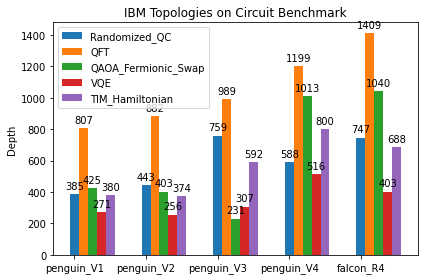

In [43]:
x = np.arange(len(labels))  # the label locations
width = 0.5/(len(labels)-1)  # the width of the bars

fig, ax = plt.subplots()
count = 0
for circuit_depth, label in zip(circuit_depth_list, circuit_labels):
    rects1 = ax.bar(x+width*count, circuit_depth, width, label=label)
    ax.bar_label(rects1, padding=3)
    count+=1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Depth')
ax.set_title('IBM Topologies on Circuit Benchmark')
ax.set_xticks(x, labels)
ax.legend()

fig.tight_layout()

plt.show()